<a href="https://colab.research.google.com/github/vajihe-ameri/predict-software-bugs-in-java-classes/blob/main/combination%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive = drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
#***import requirements***#
#-------------------------#
import keras
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.constraints import max_norm
from keras.callbacks import ModelCheckpoint
import numpy
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
file_path = "/content/drive/MyDrive/new_df/best_model.hdf5"

In [3]:
test_features = pd.read_csv("/content/drive/MyDrive/new_df/test_set.csv")
train_features = pd.read_csv("/content/drive/MyDrive/new_df/train_set.csv")
test_target = pd.read_csv("/content/drive/MyDrive/new_df/test_set_NB.csv")
train_target = pd.read_csv("/content/drive/MyDrive/new_df/train_set_NB.csv")

In [4]:
#Create and import new combined dataset features

main_model = keras.models.load_model("/content/drive/MyDrive/new_df/best_model_by_3classes")
test_prediction_points = main_model.predict(test_features)
train_prediction_points = main_model.predict(train_features)
main_model_test_prediction_df = pd.DataFrame (data=test_prediction_points, columns=['main_0_p', 'main_1_p', 'main_2_p'])
main_model_train_prediction_df = pd.DataFrame (data=train_prediction_points, columns=['main_0_p', 'main_1_p', 'main_2_p'])

zero_other_model = keras.models.load_model("/content/drive/MyDrive/new_df/best_model_by_class0")
test_prediction_points = zero_other_model.predict(test_features)
train_prediction_points = zero_other_model.predict(train_features)
zero_other_test_prediction_df = pd.DataFrame ({'0&other': test_prediction_points.ravel()})
zero_other_train_prediction_df = pd.DataFrame ({'0&other': train_prediction_points.ravel()})

one_other_model = keras.models.load_model("/content/drive/MyDrive/new_df/best_model_by_class1")
test_prediction_points = one_other_model.predict(test_features)
train_prediction_points = one_other_model.predict(train_features)
one_other_test_prediction_df = pd.DataFrame ({'1&other': test_prediction_points.ravel()})
one_other_train_prediction_df = pd.DataFrame ({'1&other': train_prediction_points.ravel()})

two_other_model = keras.models.load_model("/content/drive/MyDrive/new_df/best_model_by_class2")
test_prediction_points = two_other_model.predict(test_features)
train_prediction_points = two_other_model.predict(train_features)
two_other_test_prediction_df = pd.DataFrame ({'2&other': test_prediction_points.ravel()})
two_other_train_prediction_df = pd.DataFrame ({'2&other': train_prediction_points.ravel()})

randomForest_model =  RandomForestClassifier(n_estimators=60, max_depth= 15, max_leaf_nodes=70, random_state = 50)
randomForest_model.fit(train_features, train_target.values.ravel())
randomForest_model_test_prediction_df = pd.DataFrame ({'randomForest': randomForest_model.predict(test_features)})
randomForest_model_train_prediction_df = pd.DataFrame ({'randomForest': randomForest_model.predict(train_features)})

svm_model =  SVC()
svm_model.fit(train_features, train_target.values.ravel())
svm_model_test_prediction_df = pd.DataFrame ({'svm': svm_model.predict(test_features)})
svm_model_train_prediction_df = pd.DataFrame ({'svm': svm_model.predict(train_features)})

GaussianNB_model =  GaussianNB()
GaussianNB_model.fit(train_features, train_target.values.ravel())
GaussianNB_model_test_prediction_df = pd.DataFrame ({'GaussianNB': GaussianNB_model.predict(test_features)})
GaussianNB_model_train_prediction_df = pd.DataFrame ({'GaussianNB': GaussianNB_model.predict(train_features)})

#combined new test & train features
test_features = pd.concat([main_model_test_prediction_df, zero_other_test_prediction_df, one_other_test_prediction_df, two_other_test_prediction_df, randomForest_model_test_prediction_df, svm_model_test_prediction_df, GaussianNB_model_test_prediction_df, GaussianNB_model_test_prediction_df], axis=1)
train_features = pd.concat([main_model_train_prediction_df, zero_other_train_prediction_df, one_other_train_prediction_df, two_other_train_prediction_df, randomForest_model_train_prediction_df, randomForest_model_train_prediction_df, svm_model_train_prediction_df, GaussianNB_model_train_prediction_df], axis=1)

766/766 [==============================] - 1s 898us/step


In [5]:
!pip install tensorflow-addons
import tensorflow_addons
f_measure = tensorflow_addons.metrics.F1Score(num_classes=2, average='macro', threshold=0.5)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 16.7 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [6]:
#***Build Model***#
#-----------------#
model = Sequential()

model.add(Dense(90, kernel_initializer = 'uniform', activation = 'relu', input_dim = train_features.shape[1]))
model.add(Dense(70, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(50, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(30, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(10, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(3, kernel_initializer = 'uniform', activation = 'softmax'))

model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

checkpoint = ModelCheckpoint(file_path, monitor='loss', verbose=1,save_best_only=True, mode='auto', period=100)

#model.summary()

Epoch 1/1000
33/33 [==============================] - 1s 10ms/step - loss: 1.0919 - accuracy: 0.4140 - val_loss: 1.1759 - val_accuracy: 0.0000e+00
Epoch 2/1000
33/33 [==============================] - 0s 5ms/step - loss: 1.0197 - accuracy: 0.4141 - val_loss: 1.4910 - val_accuracy: 0.0000e+00
Epoch 3/1000
33/33 [==============================] - 0s 4ms/step - loss: 0.8903 - accuracy: 0.4210 - val_loss: 1.3562 - val_accuracy: 0.6269
Epoch 4/1000
33/33 [==============================] - 0s 4ms/step - loss: 0.8391 - accuracy: 0.5309 - val_loss: 0.8521 - val_accuracy: 0.8026
Epoch 5/1000
33/33 [==============================] - 0s 4ms/step - loss: 0.7808 - accuracy: 0.6286 - val_loss: 1.1145 - val_accuracy: 0.6344
Epoch 6/1000
33/33 [==============================] - 0s 5ms/step - loss: 0.7339 - accuracy: 0.6674 - val_loss: 1.0613 - val_accuracy: 0.5783
Epoch 7/1000
33/33 [==============================] - 0s 4ms/step - loss: 0.7088 - accuracy: 0.6758 - val_loss: 0.9312 - val_accuracy: 0.63

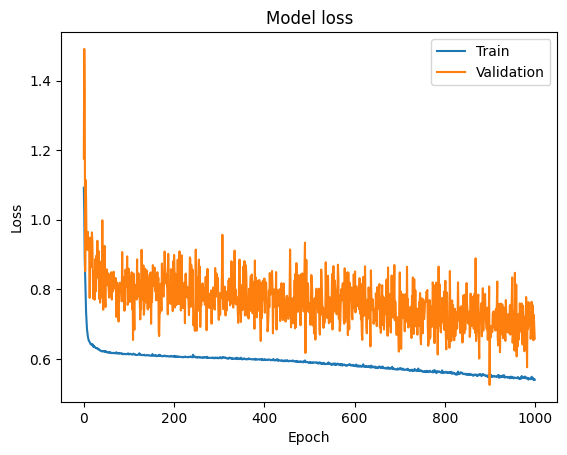



*********************************************




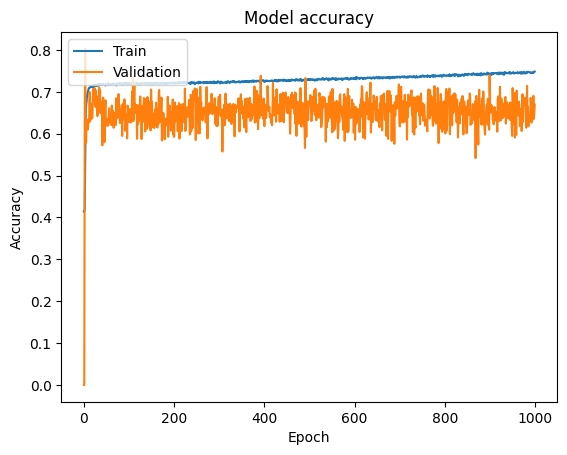



*********************************************
Test-set evaluate result:

131/131 [==============================] - 0s 2ms/step - loss: 1.0621 - accuracy: 0.6137
[1.062111496925354, 0.6136527061462402]
131/131 [==============================] - 0s 1ms/step
Report for test set:

               precision    recall  f1-score   support

     class 0       0.71      0.63      0.67      2042
     class 1       0.50      0.64      0.56      1327
     class 2       0.66      0.52      0.58       806

    accuracy                           0.61      4175
   macro avg       0.62      0.60      0.60      4175
weighted avg       0.63      0.61      0.62      4175



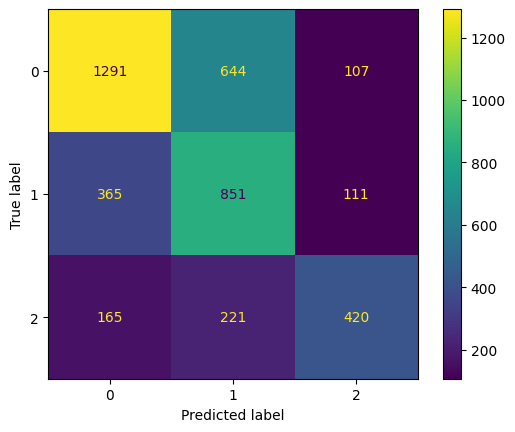



*********************************************
Train-set evaluate result:

766/766 [==============================] - 1s 1ms/step - loss: 0.5583 - accuracy: 0.7352
[0.5583484768867493, 0.7352196574211121]
766/766 [==============================] - 1s 965us/step
Report for train set:

               precision    recall  f1-score   support

     class 0       0.74      0.72      0.73      8164
     class 1       0.63      0.82      0.71      8164
     class 2       0.92      0.67      0.78      8164

    accuracy                           0.74     24492
   macro avg       0.76      0.74      0.74     24492
weighted avg       0.76      0.74      0.74     24492



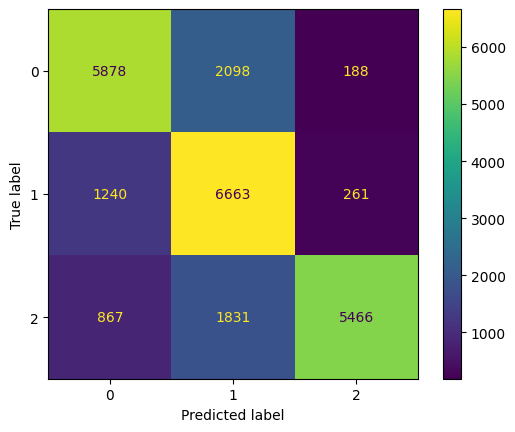

In [7]:
#***Model First Try Learning***#
#------------------------------#

history = model.fit(train_features, train_target['Number of Bugs'], batch_size = 600, epochs = 1000,  validation_split = 0.2 , callbacks=[checkpoint])

print("\n\n*********************************************\n\n")

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

print("\n\n*********************************************\n\n")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

############Pridecting results show######################

target_names = ['class 0', 'class 1', 'class 2']

print("\n\n*********************************************\nTest-set evaluate result:\n")

print(model.evaluate(test_features, test_target))
test_prediction_points = model.predict(test_features)  #Probability of each class
test_prediction = numpy.argmax(test_prediction_points, axis=1)

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix)
test_disp.plot()
plt.show()

print("\n\n*********************************************\nTrain-set evaluate result:\n")

print(model.evaluate(train_features, train_target))
train_prediction_points = model.predict(train_features)  #Probability of each class
train_prediction = numpy.argmax(train_prediction_points, axis=1)

print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix)
train_disp.plot()
plt.show()

Epoch 1/1000
3/3 [==============================] - 0s 45ms/step - loss: 0.5346 - accuracy: 0.7514 - val_loss: 0.6960 - val_accuracy: 0.6487
Epoch 2/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.5339 - accuracy: 0.7506 - val_loss: 0.6862 - val_accuracy: 0.6648
Epoch 3/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.5313 - accuracy: 0.7522 - val_loss: 0.6428 - val_accuracy: 0.6799
Epoch 4/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.5307 - accuracy: 0.7534 - val_loss: 0.6819 - val_accuracy: 0.6618
Epoch 5/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.5290 - accuracy: 0.7539 - val_loss: 0.6767 - val_accuracy: 0.6634
Epoch 6/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.5276 - accuracy: 0.7537 - val_loss: 0.6596 - val_accuracy: 0.6703
Epoch 7/1000
3/3 [==============================] - 0s 36ms/step - loss: 0.5276 - accuracy: 0.7546 - val_loss: 0.6845 - val_accuracy: 0.6654
Epoch 8/1000


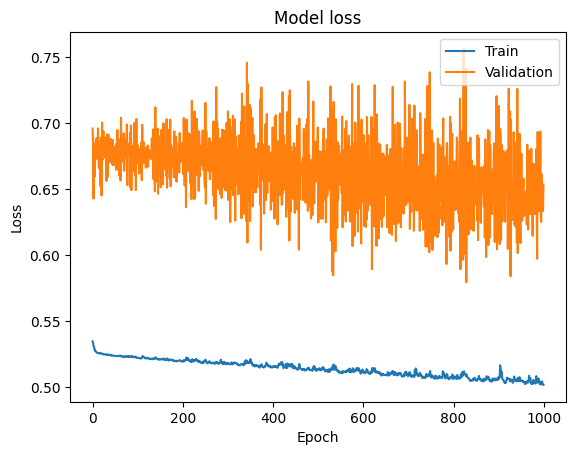



*********************************************




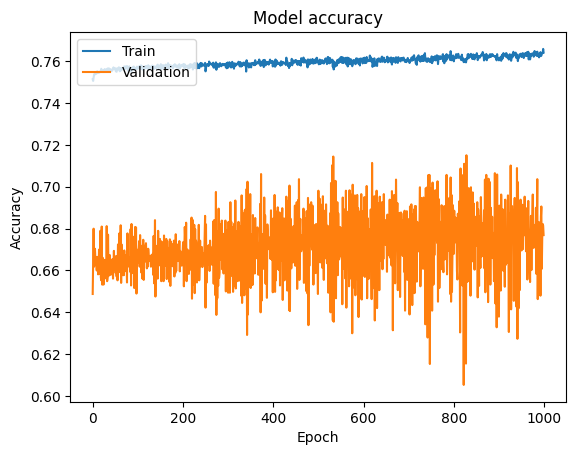



*********************************************
Test-set evaluate result:

131/131 [==============================] - 0s 1ms/step - loss: 1.3058 - accuracy: 0.6120
[1.3058052062988281, 0.6119760274887085]
131/131 [==============================] - 0s 987us/step
Report for test set:

               precision    recall  f1-score   support

     class 0       0.71      0.64      0.67      2042
     class 1       0.49      0.63      0.55      1327
     class 2       0.65      0.52      0.58       806

    accuracy                           0.61      4175
   macro avg       0.62      0.60      0.60      4175
weighted avg       0.63      0.61      0.62      4175



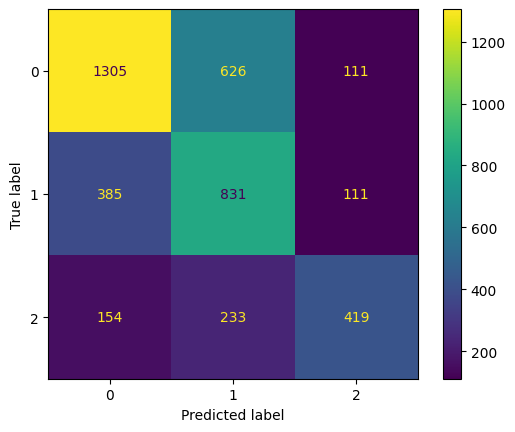



*********************************************
Train-set evaluate result:

766/766 [==============================] - 1s 1ms/step - loss: 0.5319 - accuracy: 0.7466
[0.5319056510925293, 0.7466111183166504]
766/766 [==============================] - 1s 957us/step
Report for train set:

               precision    recall  f1-score   support

     class 0       0.75      0.74      0.75      8164
     class 1       0.63      0.82      0.72      8164
     class 2       0.94      0.68      0.79      8164

    accuracy                           0.75     24492
   macro avg       0.78      0.75      0.75     24492
weighted avg       0.78      0.75      0.75     24492



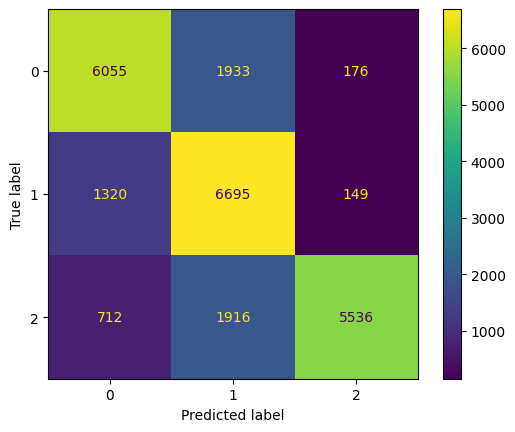

In [8]:
#***Model Continue Learning***#
#------------------------------#

model.load_weights(file_path)

history = model.fit(train_features, train_target['Number of Bugs'], batch_size = 8224, epochs = 1000,  validation_split = 0.2 , callbacks=[checkpoint])

print("\n\n*********************************************\n\n")

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

print("\n\n*********************************************\n\n")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

############Pridecting results show######################

target_names = ['class 0', 'class 1', 'class 2']

print("\n\n*********************************************\nTest-set evaluate result:\n")

print(model.evaluate(test_features, test_target))
test_prediction_points = model.predict(test_features)  #Probability of each class
test_prediction = numpy.argmax(test_prediction_points, axis=1)

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix)
test_disp.plot()
plt.show()

print("\n\n*********************************************\nTrain-set evaluate result:\n")

print(model.evaluate(train_features, train_target))
train_prediction_points = model.predict(train_features)  #Probability of each class
train_prediction = numpy.argmax(train_prediction_points, axis=1)

print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix)
train_disp.plot()
plt.show()

In [9]:
checkpoint.best

0.501581609249115

Test-set evaluate result:

131/131 [==============================] - 0s 1ms/step - loss: 1.3058 - accuracy: 0.6120
[1.3058052062988281, 0.6119760274887085]
131/131 [==============================] - 0s 923us/step
Report for test set:

               precision    recall  f1-score   support

     class 0       0.71      0.64      0.67      2042
     class 1       0.49      0.63      0.55      1327
     class 2       0.65      0.52      0.58       806

    accuracy                           0.61      4175
   macro avg       0.62      0.60      0.60      4175
weighted avg       0.63      0.61      0.62      4175



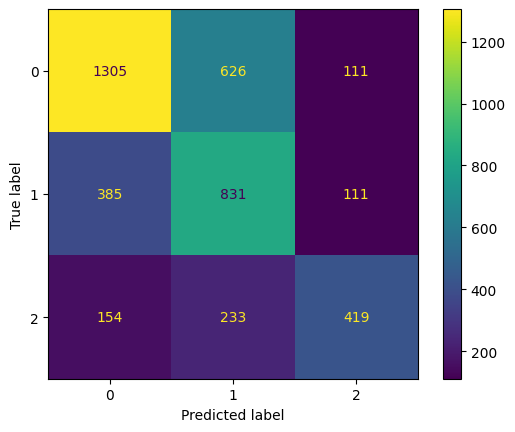



*********************************************
Train-set evaluate result:

766/766 [==============================] - 1s 1ms/step - loss: 0.5319 - accuracy: 0.7466
[0.5319056510925293, 0.7466111183166504]
766/766 [==============================] - 1s 1ms/step
Report for train set:

               precision    recall  f1-score   support

     class 0       0.75      0.74      0.75      8164
     class 1       0.63      0.82      0.72      8164
     class 2       0.94      0.68      0.79      8164

    accuracy                           0.75     24492
   macro avg       0.78      0.75      0.75     24492
weighted avg       0.78      0.75      0.75     24492



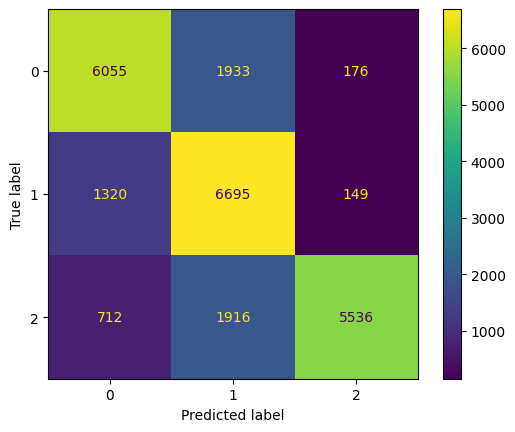

In [10]:
#***Best Model Test Only***#
#--------------------------#

model.load_weights(file_path)

############Pridecting results show######################

target_names = ['class 0', 'class 1', 'class 2']

print("Test-set evaluate result:\n")

print(model.evaluate(test_features, test_target))
test_prediction_points = model.predict(test_features)  #Probability of each class
test_prediction = numpy.argmax(test_prediction_points, axis=1)

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix)
test_disp.plot()
plt.show()

print("\n\n*********************************************\nTrain-set evaluate result:\n")

print(model.evaluate(train_features, train_target))
train_prediction_points = model.predict(train_features)  #Probability of each class
train_prediction = numpy.argmax(train_prediction_points, axis=1)

print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix)
train_disp.plot()
plt.show()

In [11]:
model.save("/content/drive/MyDrive/new_df/best_model")